<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/BoatTour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Developed by Alireza Soroudi
alireza.soroudi@gmail.com

Linkedin News letter : https://www.linkedin.com/newsletters/optimization-in-open-source-6874020019009859585/

Git hub: https://github.com/OptimizationExpert/Pyomo



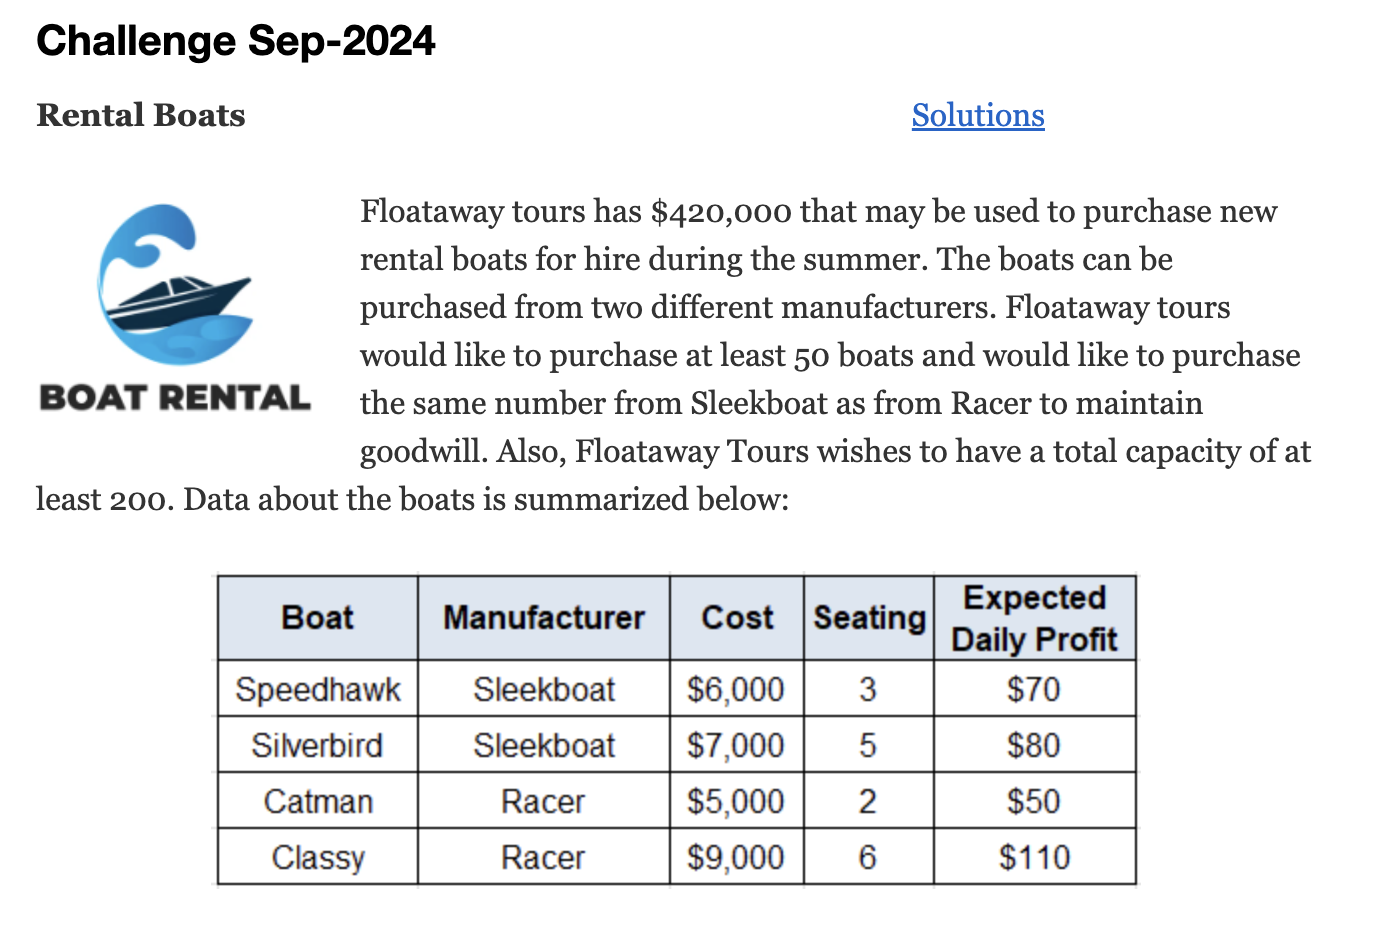

In [27]:
!pip install ortools
from ortools.sat.python import cp_model # CP-SAT solver
import numpy as np
import pandas as pd
import time

In [28]:
df = pd.DataFrame()
df['cost'] = [6,7,5,9]
df['cap'] = [3,5,2,6]
df['b'] = [70,80,50,110]
df['name'] = ['SpeedHawk', 'Silverbird','Catman','Classy']

df

,cost,cap,b,name
0,6,3,70,SpeedHawk
1,7,5,80,Silverbird
2,5,2,50,Catman
3,9,6,110,Classy


In [29]:
model = cp_model.CpModel()
solver = cp_model.CpSolver()

boats = range(4)

U = {i:model.NewIntVar(0,50, f"number_{i}")  for i in boats}

expressions = [df.loc[i,'cost']*U[i] for i in boats]
model.Add(sum(expressions) <= 420)


expressions_minreq = [U[i] for i in boats]
model.Add( sum(expressions_minreq)>= 50 )

model.Add(U[0]+U[1] == U[2]+U[3])

expressions_minreq = [df.loc[i,'cap']*U[i] for i in boats]
model.Add( sum(expressions_minreq)>= 200 )


expressions_benefit = [df.loc[i,'b']*U[i] for i in boats]

model.maximize( sum(expressions_benefit) )
status = solver.Solve(model)

st = time.time()
status = solver.Solve(model)
fn = time.time()
print(fn-st)


for i in boats:
  print(i,df.loc[i,'name'], solver.Value(U[i]))

print("Total Benefits", solver.ObjectiveValue())



0.011907339096069336
0 SpeedHawk 28
1 Silverbird 0
2 Catman 0
3 Classy 28
Total Benefits 5040.0
